In [19]:
from selenium.webdriver import Chrome
from selenium.webdriver import ChromeOptions
import time
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('user_study/user_test.csv')

In [12]:
option = ChromeOptions()
option.add_experimental_option('excludeSwitches', ['enable-automation'])
driver = Chrome(options = option, executable_path = './chromedriver')

In [13]:
url = 'http://localhost:8080/'
driver.get(url)

In [14]:
enter_ele = driver.find_element_by_xpath('//*[@id="textbox"]')
predicted_prob = []
predicted = []

for t in data['text']:
    enter_ele.clear()
    enter_text = enter_ele.send_keys(t)
    time.sleep(2)
    fake_prob = round(float(driver.find_element_by_id('fake-percentage').text.rstrip('%'))/100, 3)
    predicted_prob.append(fake_prob)
    
    if fake_prob >= 0.5:
        predicted.append(1)
    else:
        predicted.append(0)

In [11]:
# Small model
data['predicted_prob_small'] = predicted_prob
data['predicted_small'] = predicted

In [15]:
# Large model
data['predicted_prob_large'] = predicted_prob
data['predicted_large'] = predicted

In [16]:
data[]

,Unnamed: 0,text,label,class,predicted_prob_small,predicted_small,predicted_prob_large,predicted_large
0,223,In the working-class county where Joseph R. Bi...,0,0,0.973,1,0.407,0
1,29,South Africa has faced blow after blow to its ...,0,0,0.006,0,0.004,0
2,101,"The handshake came first. Then the high-five, ...",0,0,0.012,0,0.010,0
3,167,"For weeks, President Trump has minimized the c...",0,0,0.012,0,0.139,0
4,141,As ​the long Syrian war drags into its 10th ye...,0,0,0.031,0,0.139,0
...,...,...,...,...,...,...,...,...
175,135,Homes are often lumped in with the nation’s ne...,4,1,0.020,0,0.318,0
176,202,Police officers in riot gear surrounded the Ca...,4,1,0.105,0,0.979,1
177,150,The Supreme Court agreed on Friday to review t...,4,1,0.007,0,0.105,0
178,244,As the first death in the country from the cor...,4,1,0.909,1,0.997,1


In [27]:
df00 = data[data['label']==0]
df03 = data[data['label']==1]
df05 = data[data['label']==2]
df07 = data[data['label']==3]
df10 = data[data['label']==4]

In [28]:
user03 = pd.concat([df03, df00])
user05 = pd.concat([df05, df00])
user07 = pd.concat([df07, df00])
user10 = pd.concat([df10, df00])

In [29]:
# Small model
acc03_s = accuracy_score(user03['class'], user03['predicted_small'])
prec03_s = precision_score(user03['class'], user03['predicted_small'])
rec03_s = recall_score(user03['class'], user03['predicted_small'])

acc05_s = accuracy_score(user05['class'], user05['predicted_small'])
prec05_s = precision_score(user05['class'], user05['predicted_small'])
rec05_s = recall_score(user05['class'], user05['predicted_small'])

acc07_s = accuracy_score(user07['class'], user07['predicted_small'])
prec07_s = precision_score(user07['class'], user07['predicted_small'])
rec07_s = recall_score(user07['class'], user07['predicted_small'])

acc10_s = accuracy_score(user10['class'], user10['predicted_small'])
prec10_s = precision_score(user10['class'], user10['predicted_small'])
rec10_s = recall_score(user10['class'], user10['predicted_small'])

In [30]:
acc03_l = accuracy_score(user03['class'], user03['predicted_large'])
prec03_l = precision_score(user03['class'], user03['predicted_large'])
rec03_l = recall_score(user03['class'], user03['predicted_large'])

acc05_l = accuracy_score(user05['class'], user05['predicted_large'])
prec05_l = precision_score(user05['class'], user05['predicted_large'])
rec05_l = recall_score(user05['class'], user05['predicted_large'])

acc07_l = accuracy_score(user07['class'], user07['predicted_large'])
prec07_l = precision_score(user07['class'], user07['predicted_large'])
rec07_l = recall_score(user07['class'], user07['predicted_large'])

acc10_l = accuracy_score(user10['class'], user10['predicted_large'])
prec10_l = precision_score(user10['class'], user10['predicted_large'])
rec10_l = recall_score(user10['class'], user10['predicted_large'])

In [31]:
temp_list = [0.3, 0.5, 0.7, 1.0]
acc_list_s = [acc03_s, acc05_s, acc07_s, acc10_s]
prec_list_s = [prec03_s, prec05_s, prec07_s, prec10_s]
rec_list_s = [rec03_s, rec05_s, rec07_s, rec10_s]

In [36]:
print(prec_list_s,rec_list_s)

[0.6875, 0.5, 0.6428571428571429, 0.7058823529411765] [0.3055555555555556, 0.1388888888888889, 0.25, 0.3333333333333333]


In [32]:
acc_list_l = [acc03_l, acc05_l, acc07_l, acc10_l]
prec_list_l = [prec03_l, prec05_l, prec07_l, prec10_l]
rec_list_l = [rec03_l, rec05_l, rec07_l, rec10_l]

In [48]:
print(prec_list_l,rec_list_l)

[0.7857142857142857, 0.7692307692307693, 0.8, 0.8695652173913043] [0.3055555555555556, 0.2777777777777778, 0.3333333333333333, 0.5555555555555556]


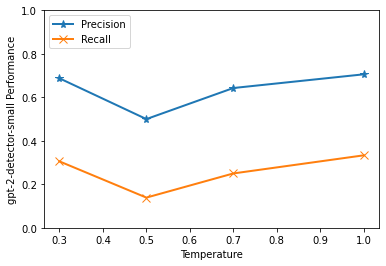

In [46]:
#plt.plot(temp_list, acc_list_s, label = 'Accuracy', marker = 'o', markersize=8, lw=2)
plt.plot(temp_list, prec_list_s, label = 'Precision', marker = '*', markersize=8, lw=2)
plt.plot(temp_list, rec_list_s, label = 'Recall', marker = 'x',markersize=8, lw=2)
#plt.plot(temp_list, auc_list, label = 'AUC Score', marker = 'v',lw=2)
plt.xlabel('Temperature')
plt.ylabel('gpt-2-detector-small Performance')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.legend(loc='upper left')
plt.show()

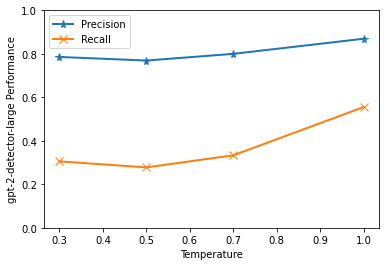

In [47]:
#plt.plot(temp_list, acc_list_l, label = 'Accuracy', marker = 'o', markersize=8, lw=2)
plt.plot(temp_list, prec_list_l, label = 'Precision', marker = '*', markersize=8, lw=2)
plt.plot(temp_list, rec_list_l, label = 'Recall', marker = 'x',markersize=8, lw=2)
plt.xlabel('Temperature')
plt.ylabel('gpt-2-detector-large Performance')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.legend(loc='upper left')
plt.show()